# Class Activity - Implement different learning types on a sample data

# Importing the Libraries

In [28]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Data Loading and Preprocessing

In [5]:
df = pd.read_csv('./sample_data.csv')
print(df.shape)
df.head()

(150, 6)


,Id,LengthCm,SepalCm,LengthCm.1,PetalCm,output
0,1,5.1,3.5,1.4,0.2,100
1,2,4.9,3.0,1.4,0.2,100
2,3,4.7,3.2,1.3,0.2,100
3,4,4.6,3.1,1.5,0.2,100
4,5,5.0,3.6,1.4,0.2,100


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          150 non-null    int64  
 1   LengthCm    150 non-null    float64
 2   SepalCm     150 non-null    float64
 3   LengthCm.1  150 non-null    float64
 4   PetalCm     150 non-null    float64
 5   output      150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [77]:
le = LabelEncoder()
y = df.iloc[:, -1]
y = le.fit_transform(y)

In [78]:
X = df.iloc[:, 1:-1].values

print(X.shape, y.shape)

(150, 4) (150,)


### 1. Perceptron Learning

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
clf.predict(X_test)
print (clf.score(X_test, y_test))

0.9666666666666667


In [48]:
class Perceptron_self:
  
  #constructor
  def __init__ (self):
    self.w = None
    self.b = None
    
  #model  
  def model(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0
  
  #predictor to predict on the data based on w
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
    
  def fit(self, X, Y, epochs = 1, lr = 1):
    self.w = np.zeros(X.shape[1])
    self.b = 0
    accuracy = {}
    max_accuracy = 0
    wt_matrix = []
    #for all epochs
    for i in range(epochs):
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w = self.w + lr * x
          self.b = self.b - lr * 1
        elif y == 0 and y_pred == 1:
          self.w = self.w - lr * x
          self.b = self.b + lr * 1
          
      wt_matrix.append(self.w)    
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if (accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w
        chkptb = self.b
    #checkpoint (Save the weights and b value)
    self.w = chkptw
    self.b = chkptb
        
    print(max_accuracy)
    #plot the accuracy values over epochs
    plt.plot(accuracy.values())
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.ylim([0, 1])
    plt.show()
    
    #return the weight matrix, that contains weights over all epochs
    return np.array(wt_matrix)

0.85


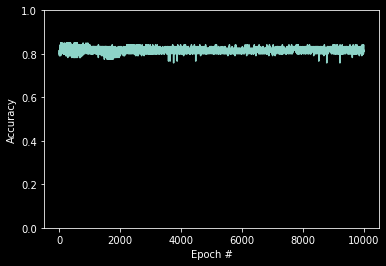

0.9333333333333333

In [50]:
model = Perceptron_self()

wt_matrix = model.fit(X_train, y_train, 10000, 0.001)
y_hat = model.predict(X_test)

accuracy_score(y_test, y_hat)

### 2. Delta Learning Rule

In [72]:
class Perceptron_delta:

    def __init__(self):
        self.weights=[]

    def activation(self,data):
        #initializing with threshold value
        activation_val=self.weights[0]
        activation_val+=np.dot(self.weights[1:],data)
        return 1 if activation_val>=0 else 0

    def fit(self,X,y,lrate,epochs):
        #initializing weight vector
        self.weights=[0.0 for i in range(len(X.columns)+1)]
        #no.of iterations to train the neural network
        for epoch in range(epochs):
            print(f"Epoch {epoch+1} ...")
            for index in range(len(X)):
                x=X.iloc[index]
                predicted=self.activation(x)
                #check for misclassification
                if(y[index]==predicted):
                    pass
                else:
                    #calculate the error value
                    error=y[index]-predicted
                    #updation of threshold
                    self.weights[0]=self.weights[0]+lrate*error
                    #updation of associated self.weights acccording to Delta rule
                    for j in range(len(x)):
                        self.weights[j+1]=self.weights[j+1]+lrate*error*x[j]
    
    def predict(self,x_test):
        predicted=[]
        for i in range(len(x_test)):
            #prediction for test set using obtained weights
            predicted.append(self.activation(x_test.iloc[i]))
        return predicted
    
    def accuracy(self,predicted,original):
        correct=0
        lent=len(predicted)
        for i in range(lent):
            if(predicted[i]==original[i]):
                correct+=1
        return (correct/lent)*100
    
    def getweights(self):
        return self.weights


In [73]:
X = df.iloc[:, 1:-1]

print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

(150, 4) (150,)


In [74]:
#training the percpetron
model = Perceptron_delta()
model.fit(X_train, y_train,0.5,10)
pred = model.predict(X_test)
print("accuracy: ",model.accuracy(pred, y_test))
print("weights: ",model.getweights())

Epoch 1 ...
Epoch 2 ...
Epoch 3 ...
Epoch 4 ...
Epoch 5 ...
Epoch 6 ...
Epoch 7 ...
Epoch 8 ...
Epoch 9 ...
Epoch 10 ...
accuracy:  96.66666666666667
weights:  [-6.5, -0.8499999999999903, 9.90000000000002, -10.350000000000005, 10.54999999999999]


### 3. Hebbian Learning

In [75]:
import time

class Hebbian(object):
    """
    Hebbian Classifier.
    This module implements the Hebbian Learning algorithm.
    Parameters:
        eta (float): Learning rate (between 0.0 and 1.0)
        n_iter (int): Set to 1 for Hebb training rule, but can be adjusted for debugging.
    Attributes:
        w_ (1-d array): Weights after fitting.
        errors_ (list): Number of misclassifications.
    """

    def __init__(self, eta=0.01, n_iter=1):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """
        Fits the training data, and allows for Hebbian learning.
        Args:
            X (array-like): Training vectors, where n_samples is the number of samples and n_features is the number of
            features. Shape = [n_samples, n_feature].
            y (array-like): Target Values. Shape =[n_samples]
        Returns:
            self (object): Returns itself with updated weights.
        """

        #   Weight initialization. Note shape[1] is number of columns, and shape[0] is number of rows.
        self.w_ = np.zeros(1 + X.shape[1])

        #   Track the misclassifications the single pass over the data.
        self.errors_ = []

        for _ in range(self.n_iter):

            errors = 0

            #   The 'zip()' function returns a list of tuples, where the i-th tuple contains the i-th element from
            #   each of the argument sequences or iterables.
            for xi, target in zip(X, y):

                #   Hebb Learning Rule (self.eta is the learning rate).
                #   Weights updated based on
                #       weight_change = learning_rate * input * output
                #
                hebb_update = self.eta * self.predict( xi )

                #   Update the weights (including the bias)
                self.w_[1:] += hebb_update * xi
                self.w_[0] += hebb_update

                #   Stopping Condition - Keep track of the errors
                errors += int(hebb_update != 0.0)

            self.errors_.append(errors)

        print( "[ " + time.strftime( '%d-%b-%Y %H:%M:%S', time.localtime() ) + " ] HEBB: Last Weights" )
        print(self.w_[1:])

        return self

    def net_input(self, X):
        """
        Calculates the Net Input for a neuron.
        Args:
            X (array-like): Training vectors, where n_samples is the number of samples and n_features is the number of
            features. Shape = [n_samples, n_feature].
        Returns:
            float: The net input (dot product) calculated from the input layer.
        """

        #   Return the dot-product of w (transposed) and x
        #   Note: self.w_[0] is basically the "threshold" or so-called "bias unit."
        # print("Bias: " + str(self.w_[0]))
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """
        Returns the class label after a unit step.
        Args:
            X (array-like): Training vectors, where n_samples is the number of samples and n_features is the number of
            features. Shape = [n_samples, n_feature].
        Returns:
            ndarray: A Numpy array value with the expected (predicted) label of the pattern.
        """
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [85]:
hebb = Hebbian(eta=0.01, n_iter=1000)
hebb.fit(X_train, y_train)

[ 25-Oct-2021 21:33:45 ] HEBB: Last Weights
[7057. 3664. 4579. 1477.]


In [86]:
y_hat = hebb.predict(X_test)
accuracy_score(y_test, y_hat)

0.4